In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys 

sys.path.append('/Users/user/Desktop/Projects/data-science/utils')
%matplotlib inline

BASE_DIR = "/Users/user/Desktop/Projects/data-science/ml-data"
FILE_DIR = "6-bank_customers.csv"
path = os.path.join(BASE_DIR, FILE_DIR)

df = pd.read_csv(path)

# Logistic Regression 
- Used generally for binary classification but can also be used for multi class classification
- One-vs-Rest and One-vs-All strategies

## One-vs-rest 
- Creating one model for each class 
- Each model classifies its class from other classes

## One-vs-One 
- Each model classifies between 2 classes so for K classes we should have K * (K-1) / 2 models total.

# Performance Metrics for Logistic Regression
- Accuracy, Precision, Recall, F1 Score 

## Precision (Kesinlik)
- Outputs how many positive prediction is actually postive 
- eg. Spam mail classification

## Recall (Duyarlılık)
- Outputs how many real positive is predicted positive by the model.
- eg. Disease classification

## F1 Score 
- Balance between Precision and Recall


# Application

In [8]:
df.head()

,age,job_satisfaction,balance,duration_last_call,num_contacts_last_month,has_housing_loan,has_personal_loan,communication_type,days_since_last_contact,campaign_response_score,subscribed
0,-0.377957,1.043895,1.043494,-0.101838,-1.617442,0.402713,0.913601,-0.067192,0.175471,-1.049646,0
1,-0.325259,1.276263,-0.686123,-2.463205,-0.489426,-0.240715,-1.469496,1.006633,-0.833692,0.957744,0
2,0.739019,-0.600903,-0.177294,1.335714,-0.817332,-0.790047,1.457365,-0.218981,0.878643,-1.257740,0
3,0.474312,-1.103002,1.189936,-0.800186,0.912377,-0.406451,-1.130950,1.985111,1.379029,1.041768,1
4,0.927365,1.114796,0.080284,1.261064,0.761179,0.921563,0.440832,0.184645,-1.567739,-0.142107,1


In [9]:
from AnalyzeDataFrame import AnalyzeDataFrame

analyze = AnalyzeDataFrame()
analyze.analyze_df(df)

-------------------- Columns --------------------
Index(['age', 'job_satisfaction', 'balance', 'duration_last_call',
       'num_contacts_last_month', 'has_housing_loan', 'has_personal_loan',
       'communication_type', 'days_since_last_contact',
       'campaign_response_score', 'subscribed'],
      dtype='object')
-------------------- First 5 Data in the Dataframe --------------------
        age  job_satisfaction   balance  duration_last_call  \
0 -0.377957          1.043895  1.043494           -0.101838   
1 -0.325259          1.276263 -0.686123           -2.463205   
2  0.739019         -0.600903 -0.177294            1.335714   
3  0.474312         -1.103002  1.189936           -0.800186   
4  0.927365          1.114796  0.080284            1.261064   

   num_contacts_last_month  has_housing_loan  has_personal_loan  \
0                -1.617442          0.402713           0.913601   
1                -0.489426         -0.240715          -1.469496   
2                -0.817332   

In [10]:
cat_cols, num_cols, cat_but_car_cols = analyze.grab_col_names(df)

Observations: 1000
Variables: 11
cat_cols: 1
num_cols: 10
cat_but_car: 0
num_but_cat: 1

Categorical Cols: ['subscribed']

Numerical Cols: ['age', 'job_satisfaction', 'balance', 'duration_last_call', 'num_contacts_last_month', 'has_housing_loan', 'has_personal_loan', 'communication_type', 'days_since_last_contact', 'campaign_response_score']

Categorical but cardinal Cols: []


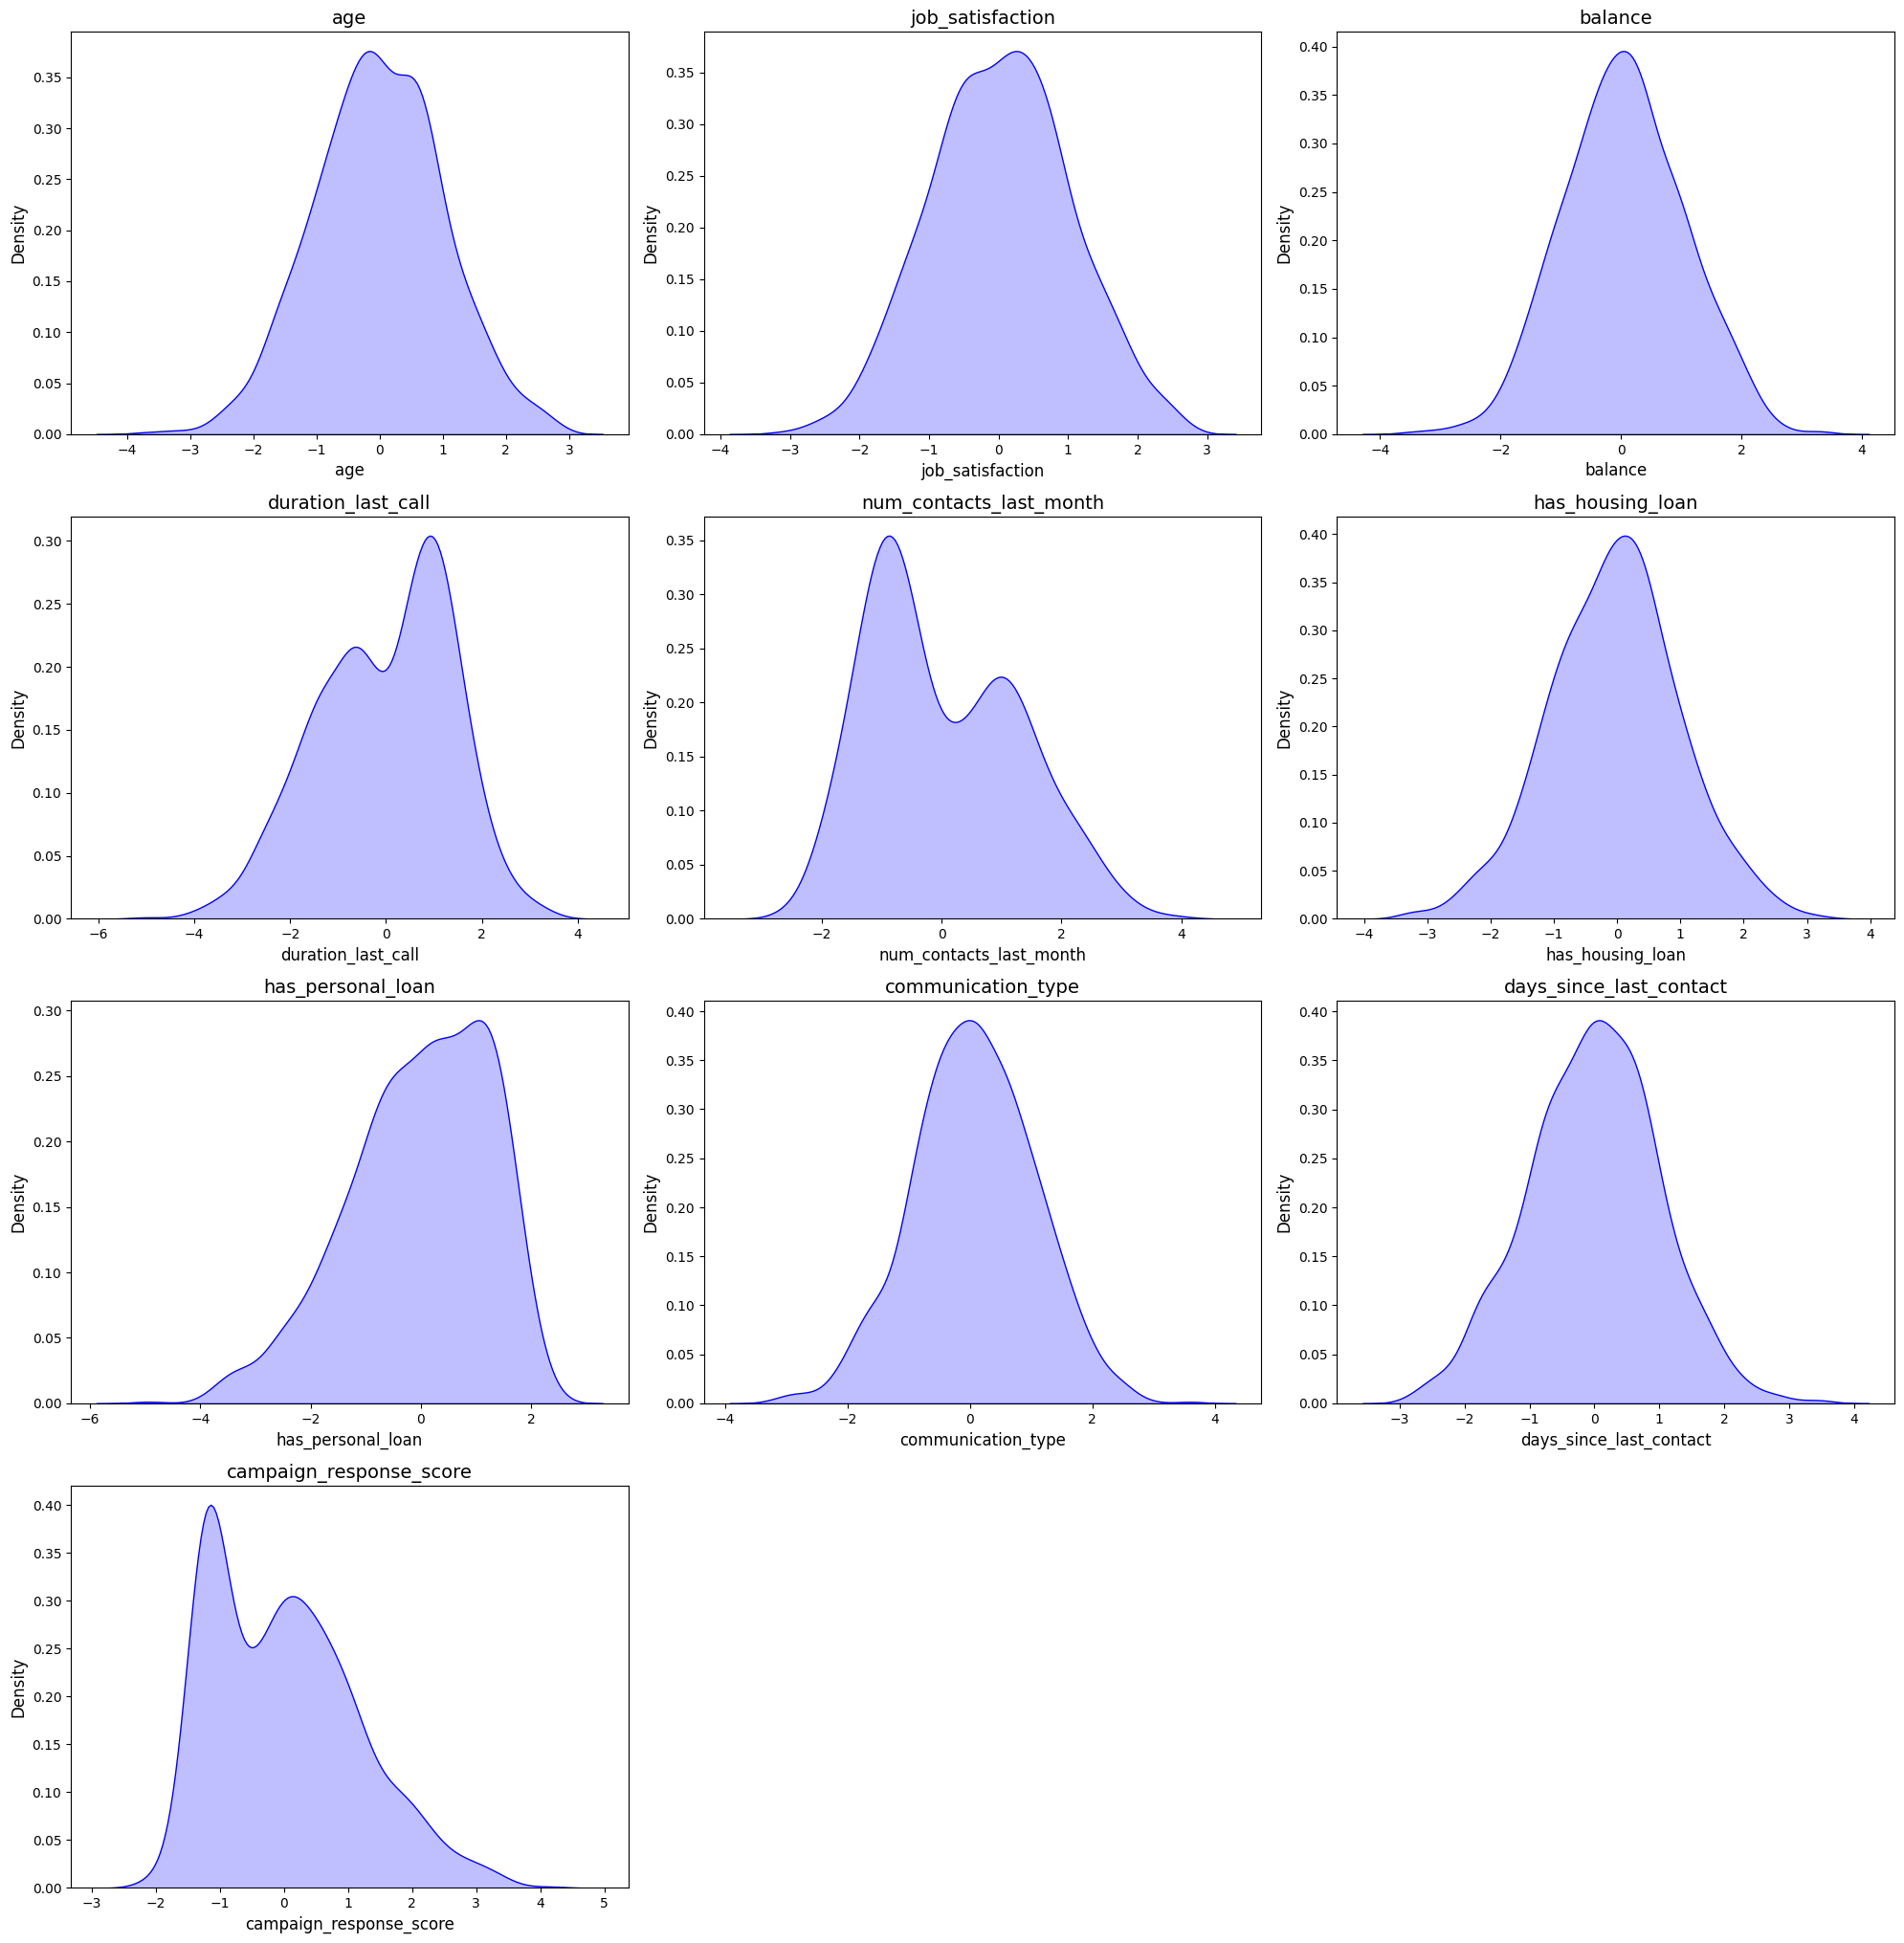

In [11]:
from VisualizeDataFrame import VisualizeDataFrame

visualize_df = VisualizeDataFrame()
visualize_df.subplot_maker(df, num_cols)

In [12]:
X = df.drop("subscribed", axis=1)
y = df["subscribed"]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

In [23]:
from EvalModel import EvalModel

eval_model = EvalModel()

eval_model.eval_class_model(X_test, y_test, model)

Accuracy: 0.9166666666666666 Recall: 0.9020979020979021 Precision: 0.9214285714285714 F1 Score: 0.911660777385159 F Beta with 0.5: 0.9174964438122333


(0.9166666666666666,
 0.9020979020979021,
 0.9214285714285714,
 0.911660777385159,
 0.9174964438122333)

# HyperParameter Tuning 

In [24]:
model = LogisticRegression()

penalty = ["l1", "l2", "elasticnet"]
c_values = [100, 10, 1, 0.1, 0.01]
solver = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]


In [26]:
params = dict(penalty=penalty, C=c_values, solver=solver)
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [27]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring="accuracy", n_jobs=-1)

In [28]:
grid.fit(X_train, y_train)

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached w

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [29]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [30]:
grid.best_score_

np.float64(0.9228571428571428)

In [ ]:
grid.

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
model = LogisticRegression()
random_cv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, n_iter=10, scoring="accuracy")


In [33]:
random_cv.fit(X_train, y_train)

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/user/

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [34]:
random_cv.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 100}

In [35]:
random_cv.best_score_

np.float64(0.9128571428571428)

In [36]:
"""
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

onevsone = OneVsOneClassifier(LogisticRegression())
onevsrest = OneVsRestClassifier(LogisticRegression())

 y_pred = onevsone.predict(X_test)

accuracy = float(accuracy_score(y_test, y_pred))
recall = float(recall_score(y_test, y_pred))
precision = float(precision_score(y_test, y_pred))
f1 = float(f1_score(y_test, y_pred))
f_beta = float(fbeta_score(y_test, y_pred, beta=beta_param))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
"""



'\nfrom sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier\n\nonevsone = OneVsOneClassifier(LogisticRegression())\nonevsrest = OneVsRestClassifier(LogisticRegression())\n\n y_pred = onevsone.predict(X_test)\n\naccuracy = float(accuracy_score(y_test, y_pred))\nrecall = float(recall_score(y_test, y_pred))\nprecision = float(precision_score(y_test, y_pred))\nf1 = float(f1_score(y_test, y_pred))\nf_beta = float(fbeta_score(y_test, y_pred, beta=beta_param))\n\nprint(classification_report(y_test, y_pred))\nprint(confusion_matrix(y_test, y_pred))\n'

# Logistic Regression Advanced 

In [37]:
path = os.path.join(BASE_DIR, "8-fraud_detection.csv")
df = pd.read_csv(path)

In [39]:
analyze.analyze_df(df)

-------------------- Columns --------------------
Index(['transaction_amount', 'transaction_risk_score', 'is_fraud'], dtype='object')
-------------------- First 5 Data in the Dataframe --------------------
   transaction_amount  transaction_risk_score  is_fraud
0            1.879910               -1.485035         0
1            0.377083               -2.238585         0
2            1.354312               -2.664638         0
3           -0.509843               -1.502950         0
4            0.863561               -1.906364         0
-------------------- DF INFO --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_amount      10000 non-null  float64
 1   transaction_risk_score  10000 non-null  float64
 2   is_fraud                10000 non-null  int64  
dtypes: float64(2), int64(1)
memory 

# Working with Imbalanced Dataset

In [40]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]


<Axes: xlabel='transaction_amount', ylabel='transaction_risk_score'>

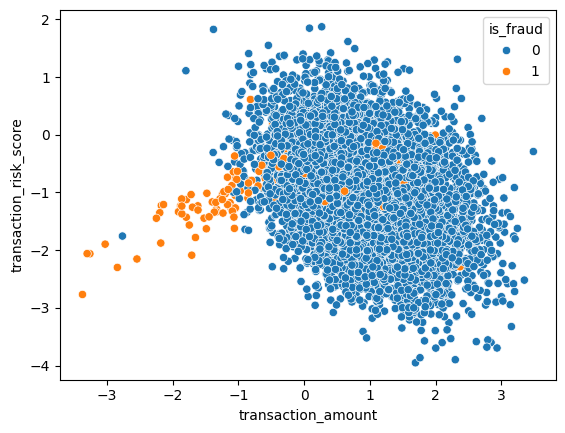

In [42]:
sns.scatterplot(x=X["transaction_amount"], y=X["transaction_risk_score"], hue=y)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [46]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [47]:
params["class_weight"] = class_weight

In [48]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [49]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring="accuracy", n_jobs=-1)

In [50]:
grid.fit(X_train, y_train)

/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached w

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [51]:
y_pred = grid.predict(X_test)


In [53]:
eval_model.eval_class_model(X_test, y_test, grid)

Accuracy: 0.9886666666666667 Recall: 0.3617021276595745 Precision: 0.8095238095238095 F1 Score: 0.5 F Beta with 0.5: 0.648854961832061


(0.9886666666666667,
 0.3617021276595745,
 0.8095238095238095,
 0.5,
 0.648854961832061)

In [54]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'lbfgs'}

## ROC and AUC

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

model_auc = roc_auc_score(y_test, y_pred)
model_auc

np.float64(0.6801737864847145)

In [56]:
model_proba = grid.predict_proba(X_test)[:, 1]
roc = roc_curve(y_test, model_proba)

In [58]:
model_fpr, model_tpr, threshold = roc

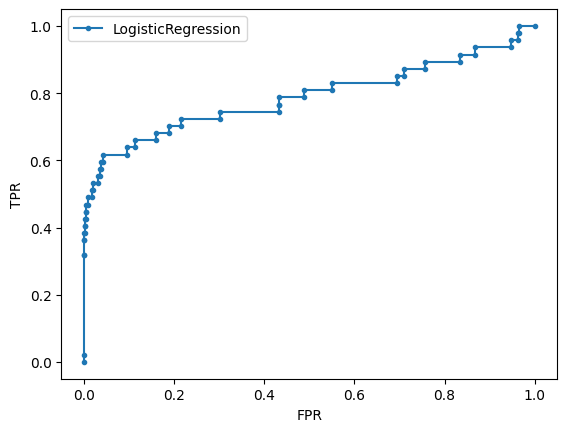

In [60]:
plt.plot(model_fpr, model_tpr, marker=".", label="LogisticRegression")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

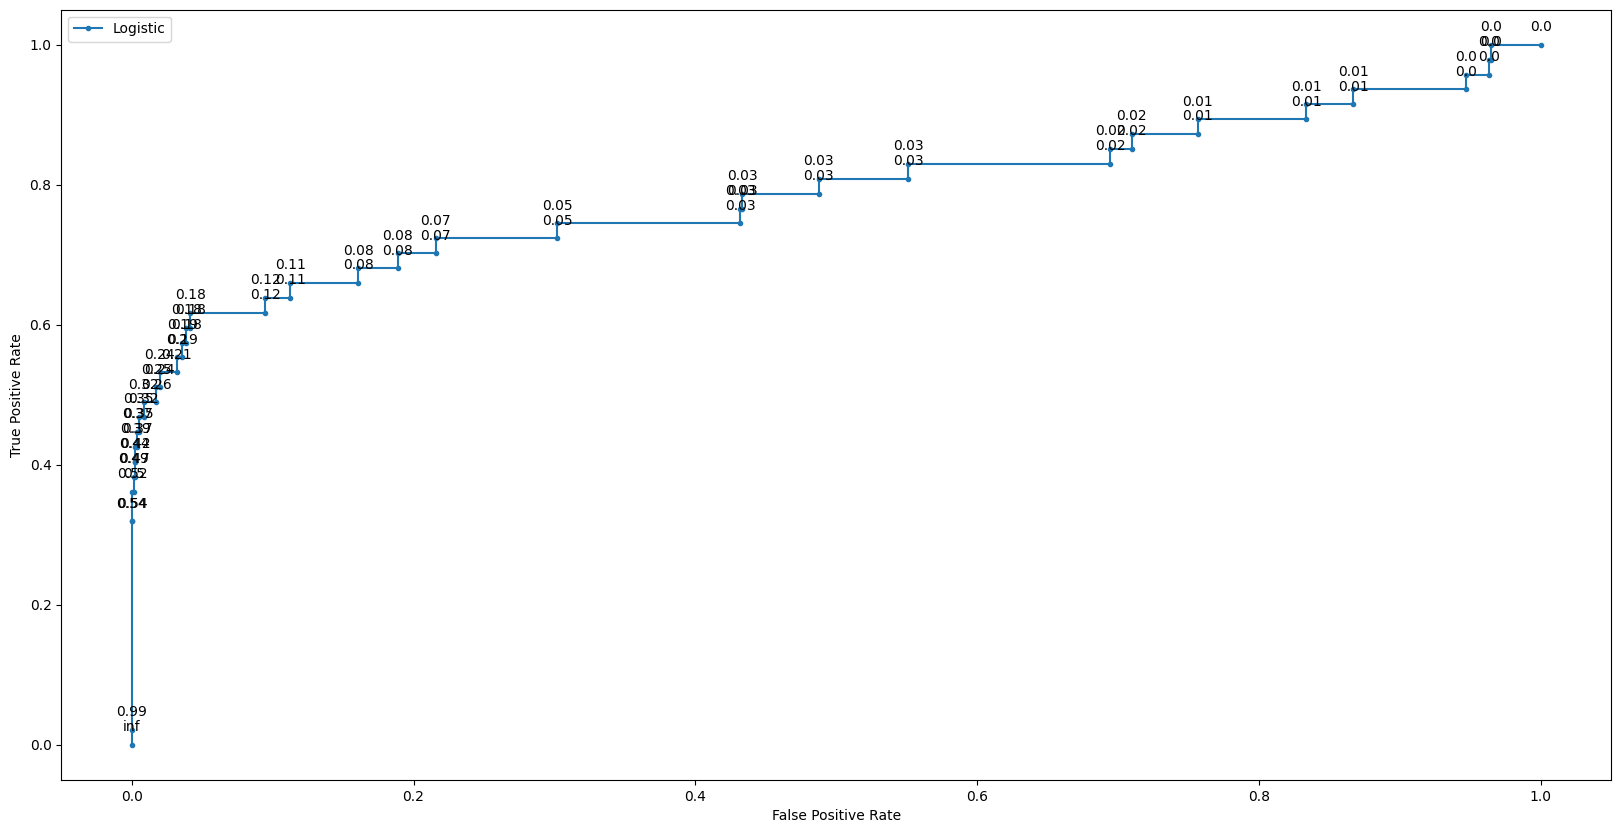

In [63]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot ROC curve
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate each point with the threshold
for fpr, tpr, thresh in zip(model_fpr, model_tpr, threshold):
    ax.annotate(f'{np.round(thresh, 2)}', (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')

# Labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show the plot
plt.show()

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
# Pick a custom threshold (e.g., from your annotated ROC curve)
custom_threshold = 0.2  # You can change this to what you chose

# Predict using custom threshold
y_pred_custom = (model_proba >= custom_threshold).astype(int)
print(model_proba >= custom_threshold)
print(y_pred_custom)

# Evaluate
print(f"\n Evaluation using custom threshold = {custom_threshold}")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[False False False ... False False False]
[0 0 0 ... 0 0 0]

 Evaluation using custom threshold = 0.2
[[2859   94]
 [  21   26]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2953
           1       0.22      0.55      0.31        47

    accuracy                           0.96      3000
   macro avg       0.60      0.76      0.65      3000
weighted avg       0.98      0.96      0.97      3000



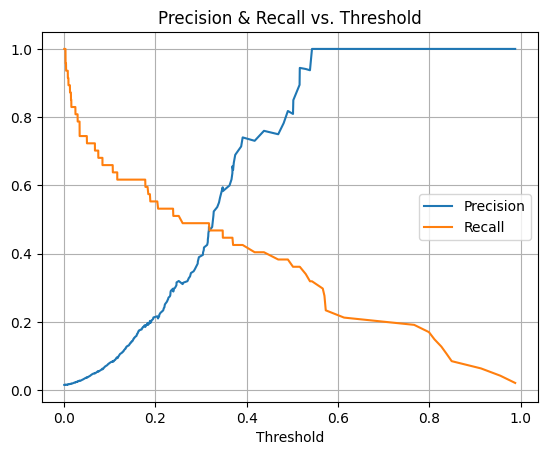

In [67]:
#If you want to find the best threshold based on precision, recall, or F1 you can plot Performance Metrics at Different Thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, model_proba)

# Plot precision and recall vs threshold
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision & Recall vs. Threshold')
plt.grid()
plt.show()